<a href="https://colab.research.google.com/github/tnounwy21/ML-23-2-/blob/main/%ED%95%98%EC%9D%B4%EB%8B%89%EC%8A%A4_%EC%A2%85%EA%B0%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U finance-datareader

In [3]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = fdr.DataReader('000660', '2018-1-01', '2023-01-01') # 000660은 sk하이닉스 종목 코드
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,77300,77300,76200,76600,2014838,0.001307
2018-01-03,78100,78800,77300,77700,3097644,0.014360
2018-01-04,78700,79700,77100,77100,3729328,-0.007722
2018-01-05,78400,79400,78300,79300,3395065,0.028534
2018-01-08,79500,80000,77400,78200,2960495,-0.013871


In [7]:
print(df.shape)

(1232, 6)


In [8]:
#데이터 전처리
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2018-01-02,0.216393,0.204348,0.227273,0.045916
2018-01-03,0.225137,0.220652,0.240093,0.106204
2018-01-04,0.231694,0.230435,0.237762,0.141375
2018-01-05,0.228415,0.227174,0.251748,0.122764
2018-01-08,0.240437,0.233696,0.241259,0.098568
...,...,...,...,...
2022-12-23,0.221858,0.215217,0.240093,0.020283
2022-12-26,0.220765,0.208696,0.230769,0.012503
2022-12-27,0.218579,0.207609,0.230769,0.028065


In [9]:
dfx.describe()

,Open,High,Low,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000
mean,0.393100,0.393682,0.412641,0.140501
std,0.222410,0.223769,0.232426,0.099625
min,0.000000,0.000000,0.000000,0.000000
25%,0.233607,0.233424,0.246795,0.073265
50%,0.312568,0.311413,0.326923,0.116117
75%,0.547814,0.543478,0.574592,0.181052
max,1.000000,1.000000,1.000000,1.000000


In [10]:
dfy.head() # 주가정보 중 종가 데이터만 따로 뺌.

,Close
Date,
2018-01-02,0.208150
2018-01-03,0.220264
2018-01-04,0.213656
2018-01-05,0.237885
2018-01-08,0.225771


In [11]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [12]:
X[:5]

[[0.21639344262271432,
  0.2043478260867344,
  0.2272727272724624,
  0.045916131997548806],
 [0.22513661202161186,
  0.22065217391280365,
  0.24009324009296026,
  0.10620437031627984],
 [0.23169398907078503,
  0.2304347826084452,
  0.23776223776196065,
  0.1413751354710068],
 [0.22841530054619846,
  0.22717391304323134,
  0.25174825174795834,
  0.1227641124390565],
 [0.24043715846968258,
  0.23369565217365904,
  0.24125874125846006,
  0.09856821795179752]]

In [13]:
y[:5]

[[0.20814977973545357],
 [0.22026431718037415],
 [0.21365638766496292],
 [0.23788546255480408],
 [0.2257709251098835]]

In [14]:
# 10일간의 데이터로 11일 째의 종가 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.2524590163931667, 0.24565217391277647, 0.27039627039595526, 0.02914481429649573], [0.2207650273221631, 0.22717391304323134, 0.24242424242395988, 0.14682593482302875], [0.22732240437133625, 0.23478260869539697, 0.25174825174795834, 0.03470852819397675], [0.22622950819647406, 0.22173913043454158, 0.2459207459204593, 0.009563438849229241], [0.22950819672106065, 0.22499999999975542, 0.2482517482514589, 0.018023009957693136], [0.22950819672106065, 0.22608695652149338, 0.2470862470859591, 0.04853549333439465], [0.2218579234970253, 0.21521739130411388, 0.24009324009296026, 0.020282525778117795], [0.2207650273221631, 0.20869565217368619, 0.2307692307689618, 0.012502724731542536], [0.2185792349724387, 0.20760869565194826, 0.2307692307689618, 0.0280651107138809], [0.21092896174840337, 0.20108695652152056, 0.21794871794846393, 0.03903341140286557]] -> [0.19052863436102366]


In [15]:
# 10일간의 OHLVC 데이터
data_X[0]

[[0.21639344262271432,
  0.2043478260867344,
  0.2272727272724624,
  0.045916131997548806],
 [0.22513661202161186,
  0.22065217391280365,
  0.24009324009296026,
  0.10620437031627984],
 [0.23169398907078503,
  0.2304347826084452,
  0.23776223776196065,
  0.1413751354710068],
 [0.22841530054619846,
  0.22717391304323134,
  0.25174825174795834,
  0.1227641124390565],
 [0.24043715846968258,
  0.23369565217365904,
  0.24125874125846006,
  0.09856821795179752],
 [0.22732240437133625,
  0.22173913043454158,
  0.2284382284379622,
  0.11991391101075433],
 [0.20983606557354115,
  0.1978260869563067,
  0.18414918414896952,
  0.44173300442610297],
 [0.17158469945336438,
  0.1663043478259062,
  0.17832167832147047,
  0.14407767941678554],
 [0.17267759562822657,
  0.17391304347807182,
  0.17832167832147047,
  0.2488198397760403],
 [0.17704918032767536,
  0.16956521739112004,
  0.18414918414896952,
  0.1309043157798905]]

In [16]:
# data_X[0]을 넣었을 때의 정답인 data_y[0]
data_y[0]

[0.18392070484561243]

In [17]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 1222 1222


In [18]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (855, 10, 4) (855, 1)
테스트 데이터의 크기 : (367, 10, 4) (367, 1)


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [20]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# 학습

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
29/29 [==============================] - 4s 11ms/step - loss: 0.0921
Epoch 2/70
29/29 [==============================] - 0s 12ms/step - loss: 0.0242
Epoch 3/70
29/29 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 4/70
29/29 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 5/70
29/29 [==============================] - 0s 11ms/step - loss: 0.0056
Epoch 6/70
29/29 [==============================] - 0s 11ms/step - loss: 0.0056
Epoch 7/70
29/29 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 8/70
29/29 [==============================] - 0s 17ms/step - loss: 0.0056
Epoch 9/70
29/29 [==============================] - 0s 15ms/step - loss: 0.0051
Epoch 10/70
29/29 [==============================] - 0s 16ms/step - loss: 0.0044
Epoch 11/70
29/29 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 12/70
29/29 [==============================] - 0s 16ms/step - loss: 0.0042
Epoch 13/70
29/29 [==================

12/12 [==============================] - 0s 7ms/step


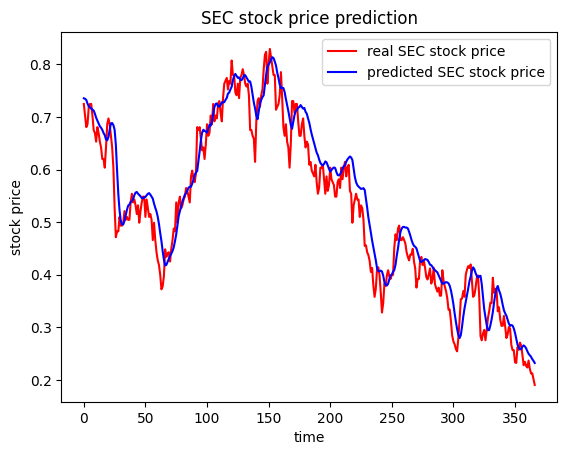

내일 주가 : [91422.07126062] KRW


In [24]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')